In [1]:
library("data.table")
library("qtl")

# inputs

In [2]:
genfile =  '../data/20200714_xo3mb_missing_ws50_bs1e6_res10kb_3mbfilled.csv'
phefile = '../data/20200708_intersection_normbw8.csv'

In [3]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir='.',
                    genfile=genfile,
                    phefile = phefile )

 --Read the following data:
	 3135  individuals
	 1088  markers
	 5  phenotypes
 --Cross type: f2 


In [4]:
summary(datf2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     5 
    Percent phenotyped: 100 100 98 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1088 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 7 
    Percent genotyped:  47.9 
    Genotypes (%):      AA:26.0  AB:47.9  BB:26.1  not BB:0.0  not AA:0.0 

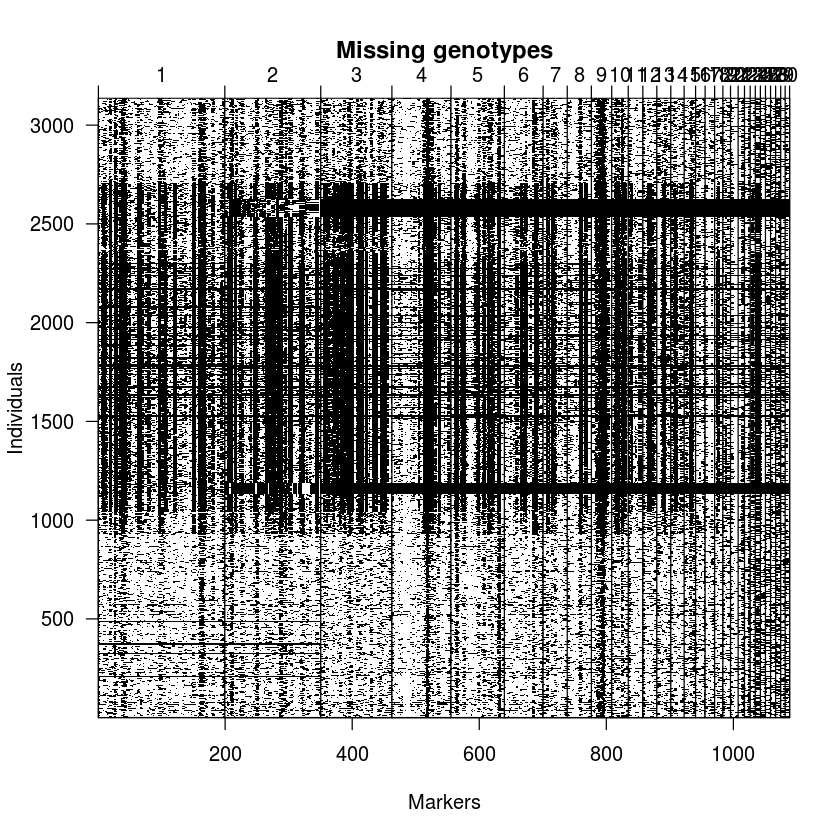

In [5]:
plotMissing(datf2)

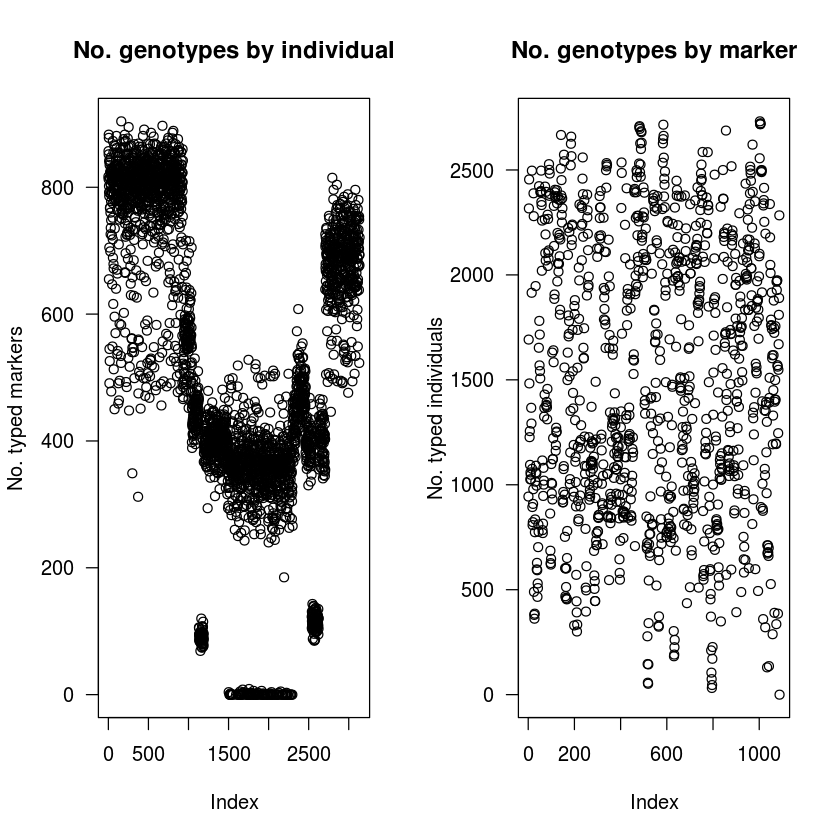

In [6]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [7]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 500])


In [8]:
todrop

[1] "1-24"  "1-25"  "1-26"  "1-27"  "1-39"  "1-160" "1-162" "1-165" "1-166"
[10] "1-198" "2-9"   "2-10"  "2-11"  "2-12"  "2-50"  "2-51"  "2-89"  "2-90" 
[19] "4-53"  "4-54"  "4-55"  "4-56"  "4-57"  "4-58"  "5-8"   "5-9"   "5-10" 
[28] "5-74"  "5-75"  "5-76"  "5-77"  "5-78"  "6-47"  "9-12"  "9-13"  "9-14" 
[37] "9-15"  "9-16"  "9-17"  "9-18"  "9-19"  "9-20"  "9-21"  "10-25" "13-21"
[46] "14-20" "19-11" "21-9"  "22-8"  "23-7"  "24-7"  "26-7"  "27-7"  "28-7" 
[55] "29-6"  "30-6"

In [9]:
datf2.1 <- drop.markers(datf2, todrop)

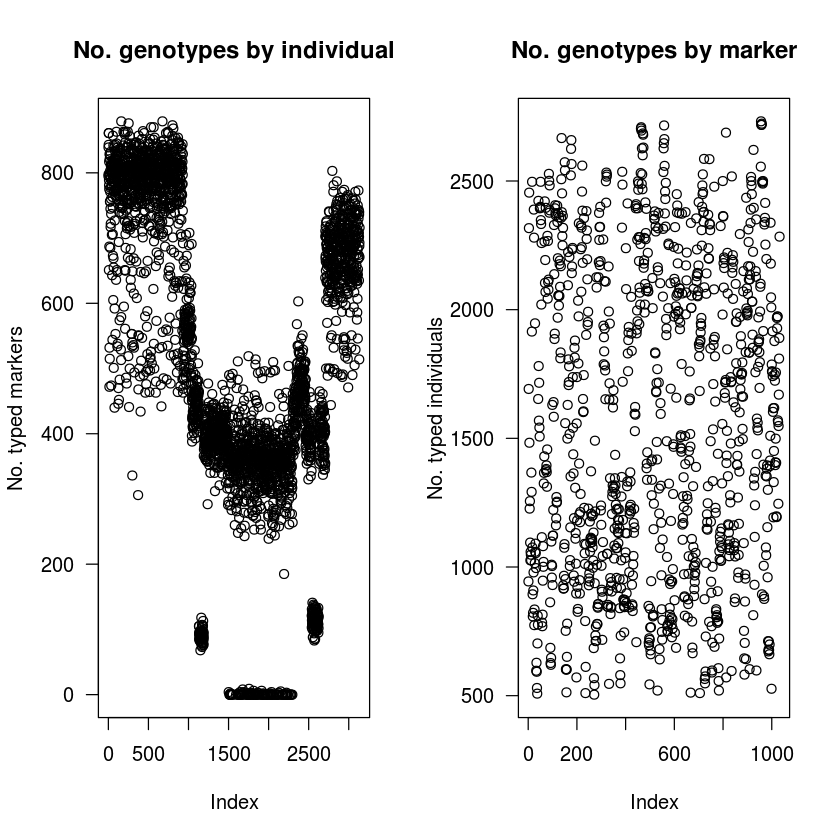

In [10]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [11]:
datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>100)) # removing all individuals that have less than 10% of all markers


In [12]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 3135

[1] 2955

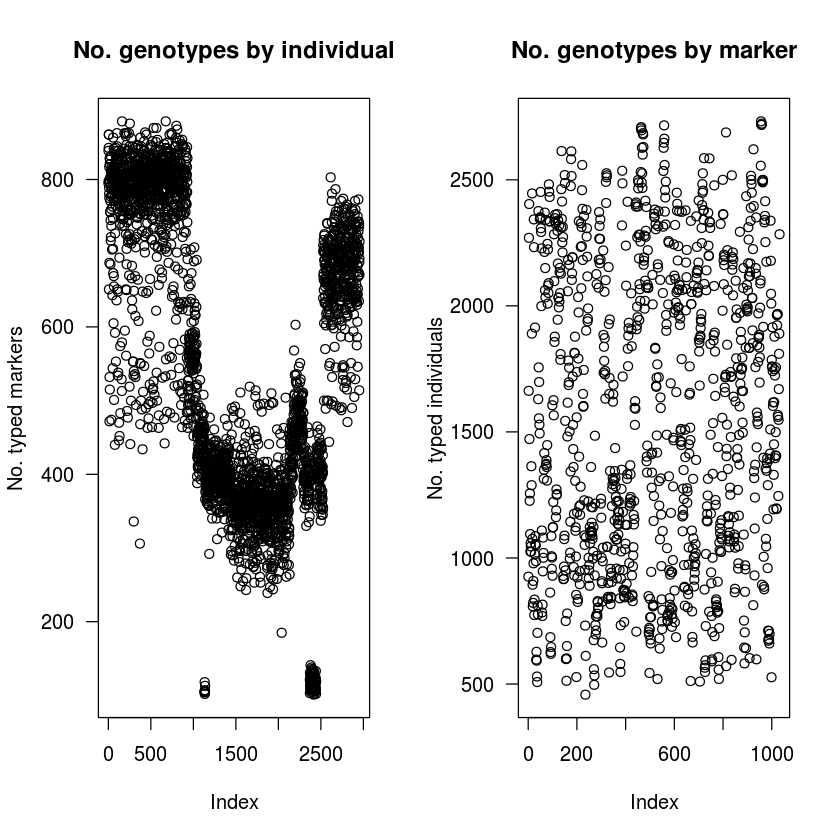

In [13]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [14]:
summary(datf2.2)

    F2 intercross

    No. individuals:    2955 

    No. phenotypes:     5 
    Percent phenotyped: 100 100 97.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1032 
    No. markers:        189 143 112 87 76 60 38 38 22 25 23 22 21 20 18 15 15 13 
                        11 12 9 8 7 7 8 7 7 7 6 6 
    Percent genotyped:  52.8 
    Genotypes (%):      AA:26.0  AB:47.8  BB:26.1  not BB:0.0  not AA:0.0 

In [15]:
cg <- comparegeno(datf2.2)

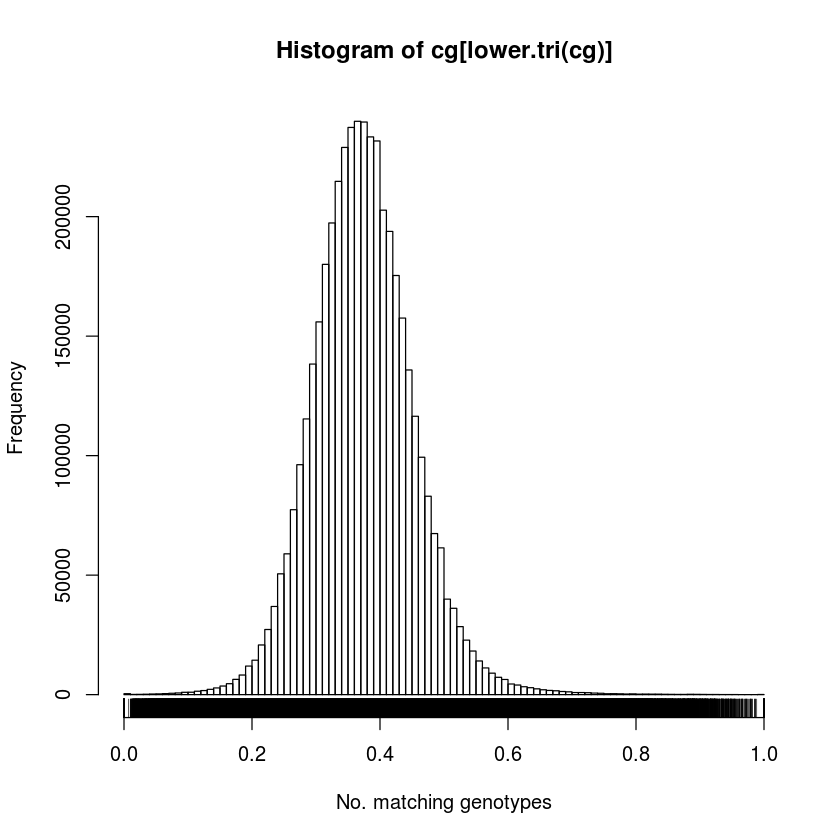

In [16]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [17]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [18]:
wh

row,col
249,299
299,423
423,515
423,538
515,538
423,546
538,546
423,585
538,585
515,689


In [19]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`2-2`
[1] "2-1"

$`2-149`
[1] "2-150"

$`3-2`
[1] "3-1"

$`3-110`
[1] "3-111"

$`5-0`
[1] "4-92"

$`5-2`
[1] "5-1"

$`5-82`
[1] "5-83"

$`6-56`
[1] "6-57" "6-58"

$`7-0`
[1] "6-60"

$`7-8`
[1] "7-7"

$`8-2`
[1] "7-37" "8-0"  "8-1" 

$`8-35`
[1] "8-36"

$`9-0`
[1] "8-37"

$`9-30`
[1] "9-31"

$`11-0`
[1] "11-1"

$`11-21`
[1] "11-20" "11-22"

$`13-0`
[1] "12-21"

$`13-1`
[1] "13-2"

$`16-0`
[1] "15-17"

$`16-11`
[1] "16-12" "16-13"

$`17-0`
[1] "16-14"

$`18-0`
[1] "17-14"

$`18-11`
[1] "18-12"

$`20-10`
[1] "20-9"  "20-11"

$`25-5`
[1] "25-7"

$`28-5`
[1] "28-6"

$`29-3`
[1] "29-4"

$`30-5`
[1] "30-4"



In [20]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
“Sex column should be coded as 0=female 1=male; sex ignored.”

In [21]:
gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
1-0,1,2029,125,540,261,0,0,5.807085e-15
1-1,1,1292,269,863,531,0,0,3.591542e-19
1-2,1,685,406,1114,750,0,0,1.553506e-23
1-3,1,551,434,1193,777,0,0,5.210274e-22
1-43,1,2144,150,459,202,0,0,3.065469e-05
1-46,1,579,689,1170,517,0,0,2.979051e-06
1-76,1,614,614,1270,457,0,0,5.673847e-09
1-82,1,1507,412,745,291,0,0,2.209180e-05
1-83,1,709,752,1086,408,0,0,3.878862e-24
1-84,1,946,739,936,334,0,0,3.260586e-38


In [22]:
length(todrop)

[1] 426

In [23]:
datf2.3 <- datf2.2

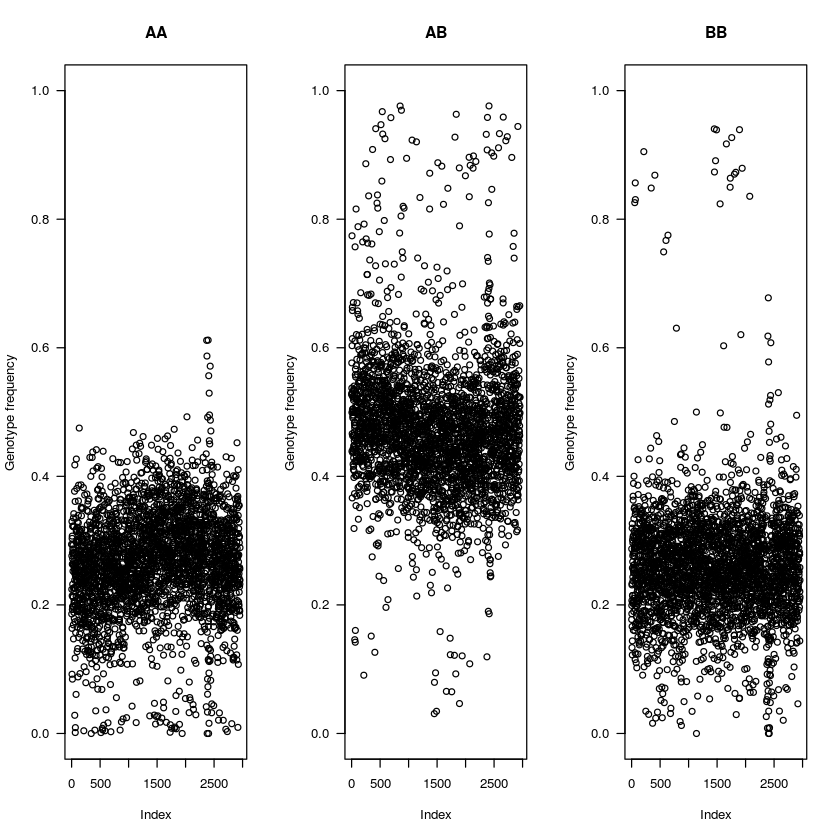

In [24]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

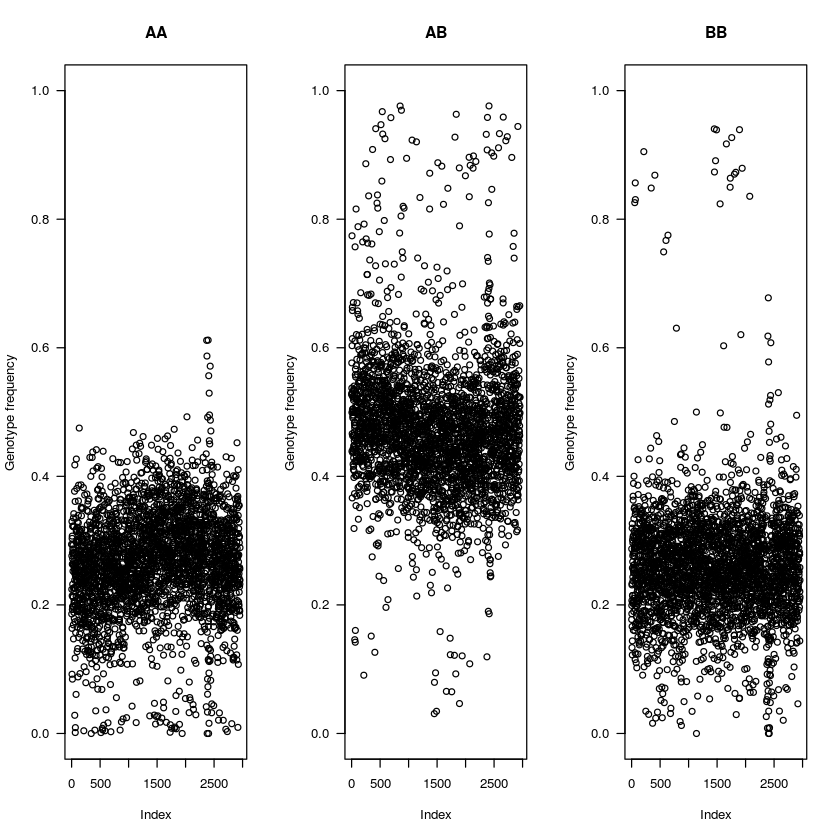

In [25]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [26]:
id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [27]:
datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [28]:
datf2.4 <- datf2.3

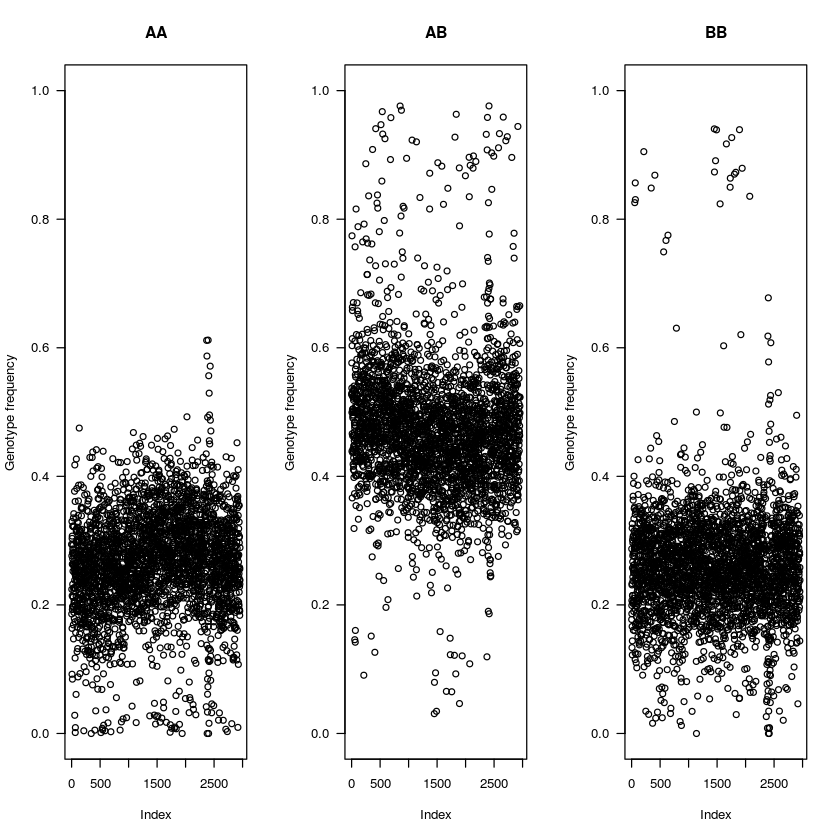

In [29]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [30]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

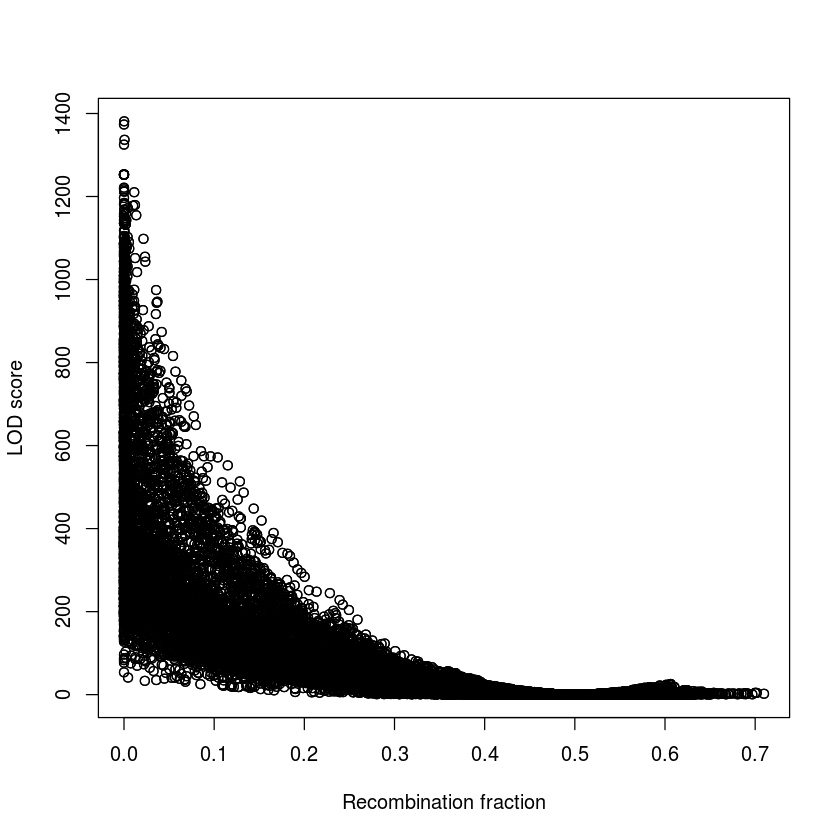

In [31]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

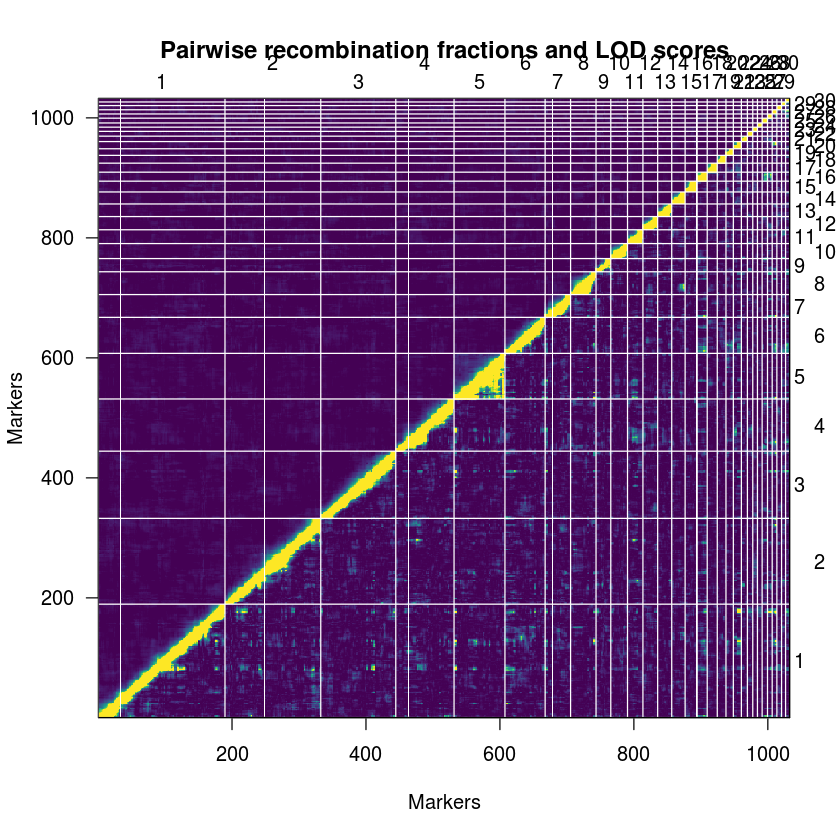

In [32]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [33]:
genmap <- est.map(datf2.4, error.prob=0.005)

Warning message in est.map(datf2.4, error.prob = 0.005):
“Didn't converge!”

In [34]:
summaryMap(genmap)

,n.mar,length,ave.spacing,max.spacing
1,189,502.1964704,2.67125782,16.9232107
2,143,365.9199374,2.57690097,13.7574360
3,112,267.9557956,2.41401618,18.8527631
4,87,252.3029352,2.93375506,17.3251347
5,76,186.0186636,2.48024885,17.1674430
6,60,162.7840960,2.75905247,12.6324760
7,38,100.1610775,2.70705615,14.1843024
8,38,99.9547915,2.70148085,16.5772600
9,22,72.8152320,3.46739200,25.8548868
10,25,35.3525085,1.47302119,7.9739866


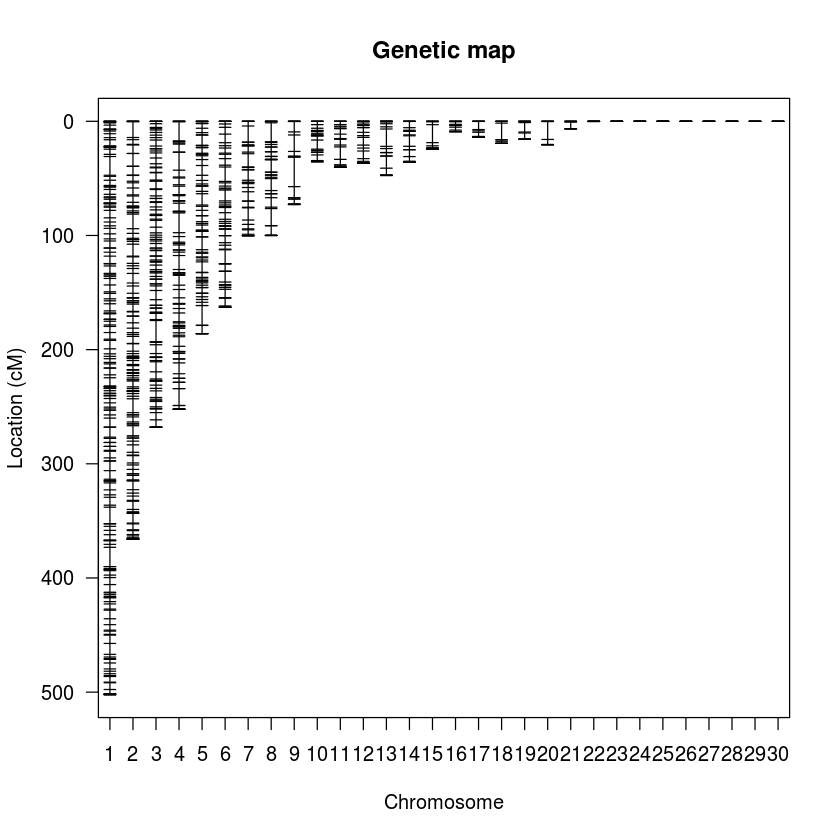

In [35]:
plotMap(genmap)

In [36]:
datf2.4 <- replace.map(datf2.4, genmap)

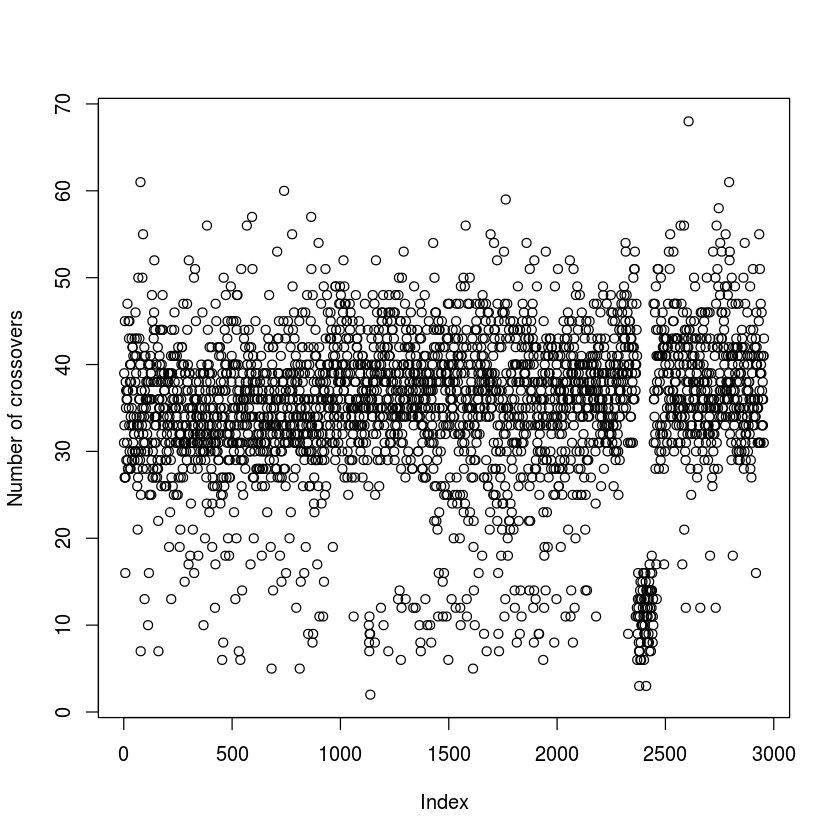

[1] 34.82775

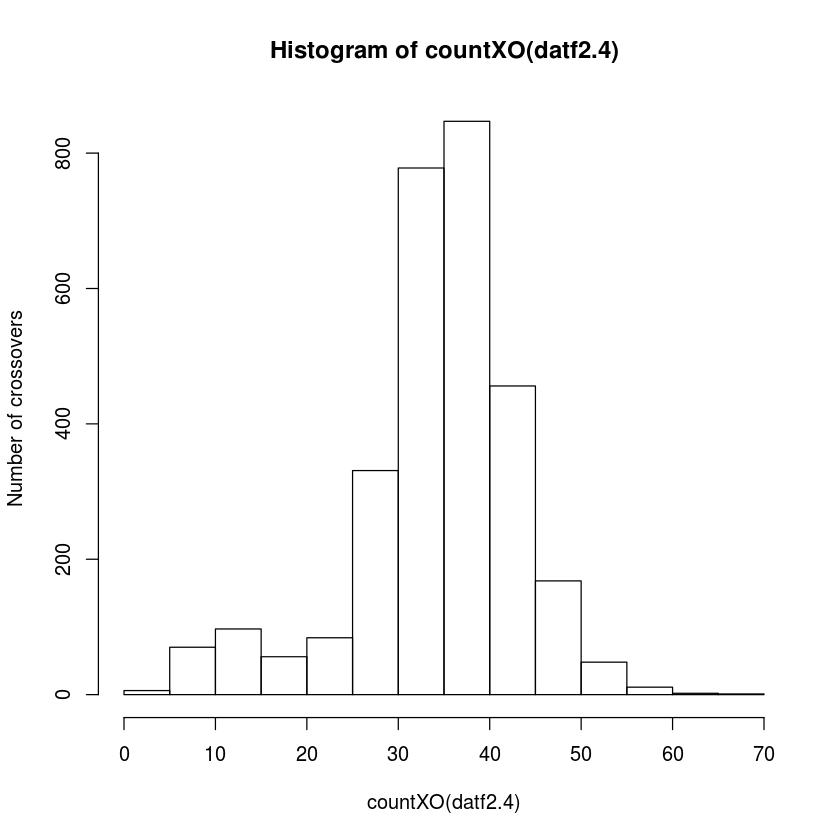

In [37]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [38]:
datf2.5 <- datf2.4

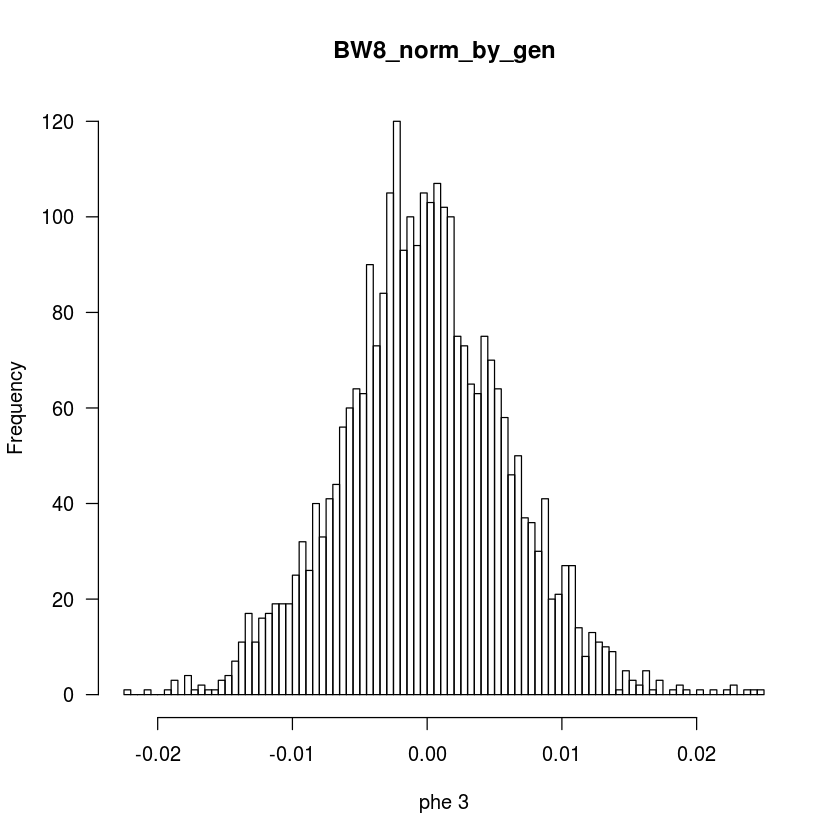

In [39]:
plotPheno(datf2.5, pheno.col=3)

In [40]:
#plotMissing(datf2.5, reorder=TRUE)

In [41]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [42]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [43]:
out.em <- scanone(datf2.5, pheno.col = 2)

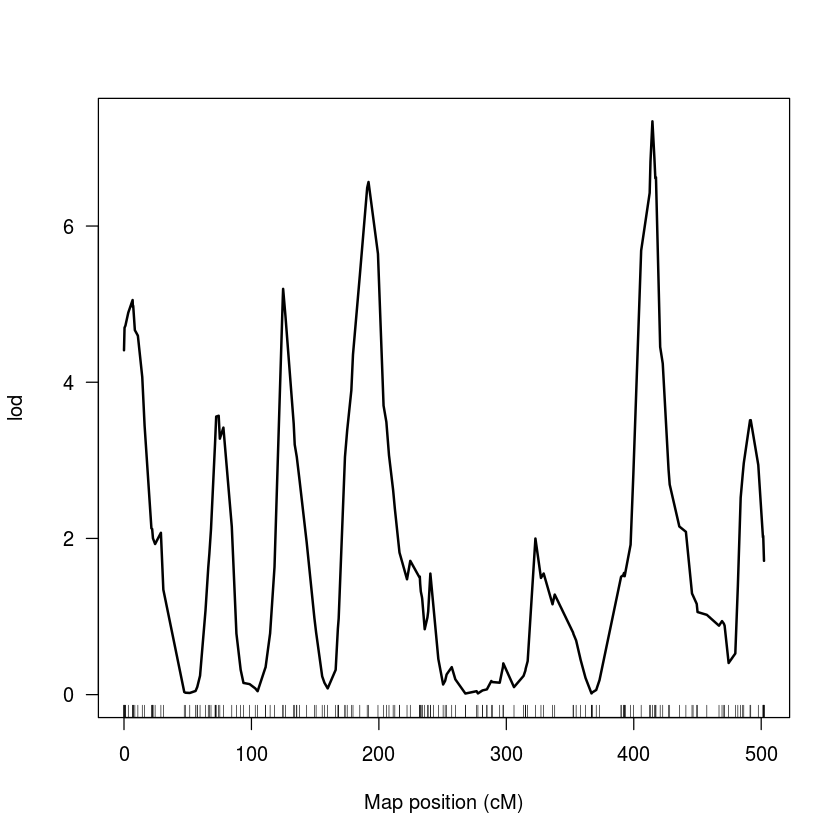

In [44]:
plot(out.em, chr=1)

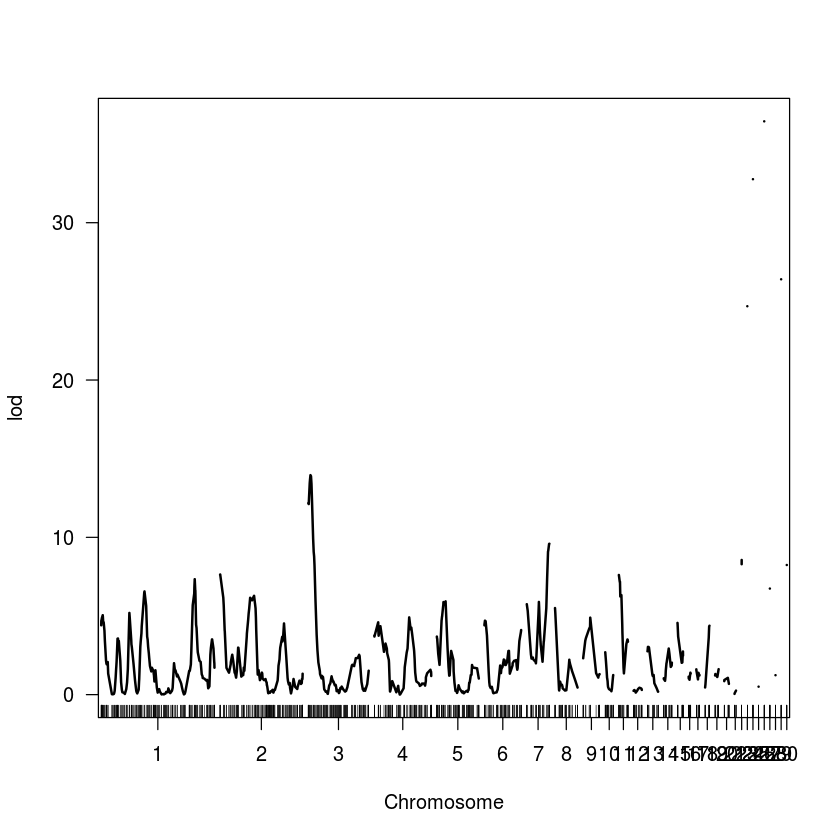

In [45]:
plot(out.em)

In [46]:
ac <- pull.pheno(datf2.5, c("SEX"))

In [47]:
ac2 <- pull.pheno(datf2.5, c("SEX","GENERATION"))

In [48]:
ac3 <- pull.pheno(datf2.5, c("SEX","GENERATION","DAM"))

Warning message in pull.pheno(datf2.5, c("SEX", "GENERATION", "DAM")):
“Phenotype "DAM" not found.”

In [49]:
out.acovar <- scanone(datf2.5, pheno.col = 2, addcovar=ac2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 3 individuals with missing covariates.
”

In [50]:
out.acovar2 <- scanone(datf2.5, pheno.col = 3, addcovar=ac)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 62 individuals with missing phenotypes.
”

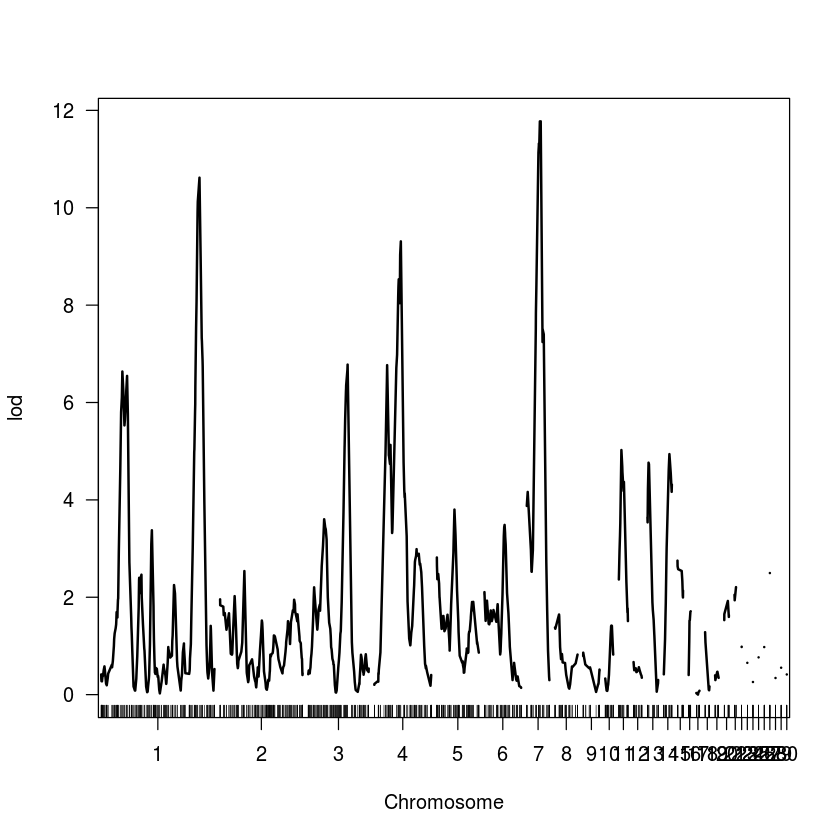

In [51]:
plot(out.acovar2)

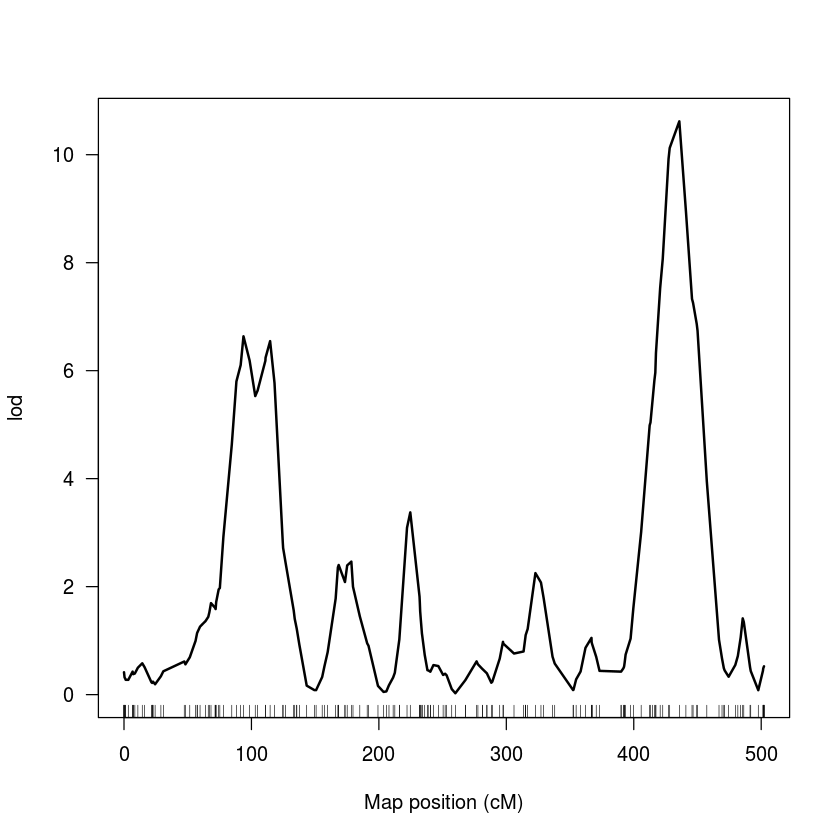

In [52]:
plot(out.acovar2, chr=1)

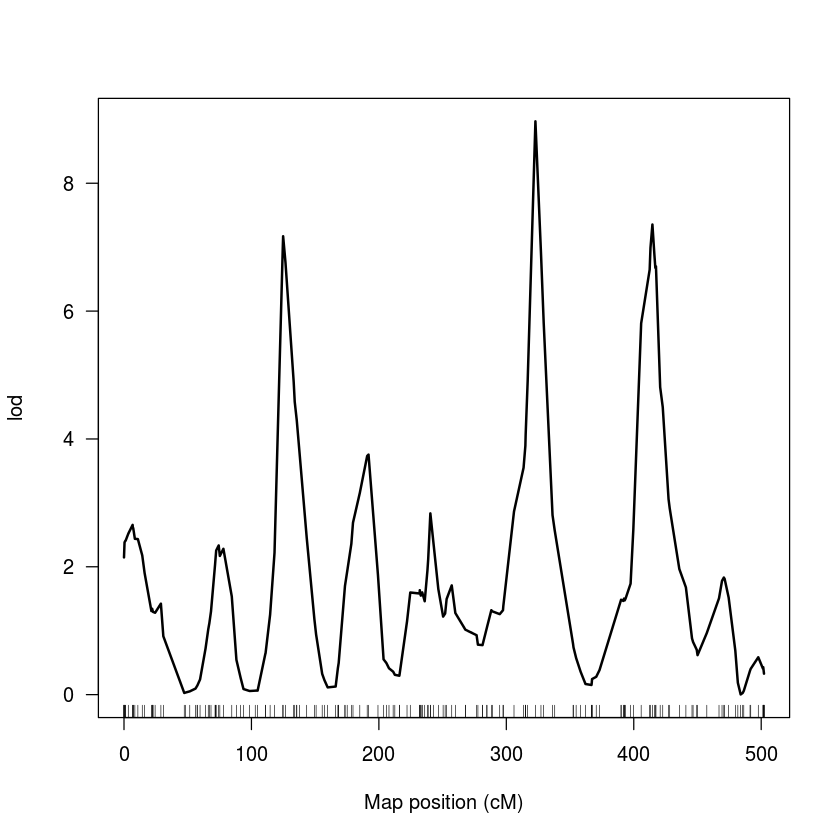

In [53]:
plot(out.acovar, chr=1)

In [54]:
out.acovar2

,chr,pos,lod
1-0,1,0.0000000,0.4151599
1-1,1,0.0000001,0.4151599
1-2,1,0.0000002,0.4151599
1-3,1,0.0000003,0.4151599
1-4,1,0.4260084,0.3215196
1-5,1,1.1121240,0.2890811
1-6,1,1.2848561,0.2761927
1-7,1,3.3626244,0.2741557
1-8,1,6.7609789,0.4270526
1-9,1,6.9807566,0.3836064


In [55]:
write.csv(out.acovar2, "20190828_out_all_normbw8_ctrlsex.csv")